# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

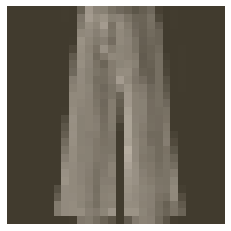

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [3]:
from torch import nn
from torch import optim

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [19]:
# TODO: Train the network here
#.03
for l in [0.256]:
     model=nn.Sequential(nn.Linear(784,484),
                         nn.ReLU(),
                         nn.Linear(484,256),
                         nn.ReLU(),
                         nn.Linear(256,169),
                         nn.ReLU(),
                         nn.Linear(169,81),
                         nn.ReLU(),
                         nn.Linear(81,64),
                         nn.ReLU(),
                         nn.Linear(64,36),
                         nn.ReLU(),
                         nn.Linear(36,10),
                         nn.LogSoftmax(dim=1))
     criterion=nn.NLLLoss()
     optimizer = optim.SGD(model.parameters(), lr=l)
     epoch=20
     for i in range(epoch):
          run_loss=0
          for image,label in trainloader:
               image=image.view(image.shape[0],-1)
               optimizer.zero_grad()
               out=model(image)
               loss=criterion(out,label)
               loss.backward()
               optimizer.step()
               run_loss=run_loss+loss.item()
          print("for lr=",l," epoch ",i+1," loss= ",run_loss)
     print("")

for lr= 0.256  epoch  1  loss=  1034.6500254571438
for lr= 0.256  epoch  2  loss=  499.1649007499218
for lr= 0.256  epoch  3  loss=  406.1937974989414
for lr= 0.256  epoch  4  loss=  360.2330942898989
for lr= 0.256  epoch  5  loss=  340.09458577632904
for lr= 0.256  epoch  6  loss=  313.79629450291395
for lr= 0.256  epoch  7  loss=  296.8358704596758
for lr= 0.256  epoch  8  loss=  282.37971509993076
for lr= 0.256  epoch  9  loss=  271.48156171664596
for lr= 0.256  epoch  10  loss=  257.6118809580803
for lr= 0.256  epoch  11  loss=  247.56422128900886
for lr= 0.256  epoch  12  loss=  245.1144264563918
for lr= 0.256  epoch  13  loss=  235.19151512160897
for lr= 0.256  epoch  14  loss=  225.83602039143443
for lr= 0.256  epoch  15  loss=  217.52218256518245
for lr= 0.256  epoch  16  loss=  210.94731447845697
for lr= 0.256  epoch  17  loss=  204.13398540765047
for lr= 0.256  epoch  18  loss=  198.49708049371839
for lr= 0.256  epoch  19  loss=  192.8207547403872
for lr= 0.256  epoch  20  lo

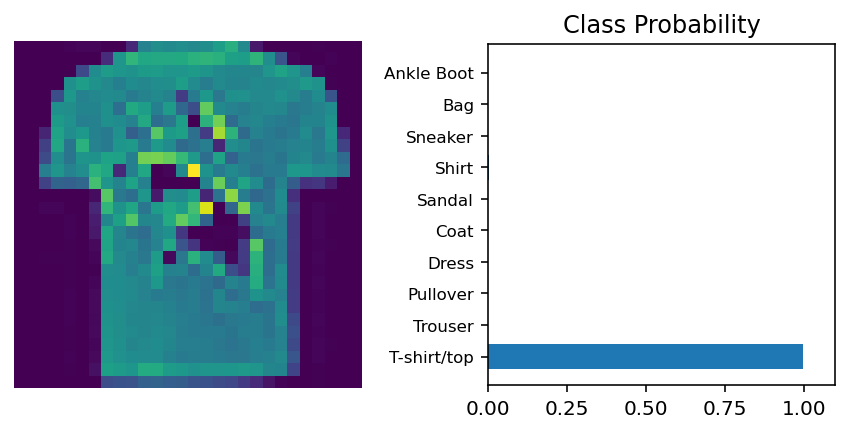

In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
# c=0
# d=0
# for img,lab in testloader:
    
# #for i in range(images.length()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')
